# Basics of Genetic Algorithms

Abstract: Continuing our discussion on gradient-free optimization methods, we will explore various concepts in Genetic Algorithms applied to the traveling salesman problem (TSP). We will start with a naive introduction to the concept, and build our way to a more complicated algorithm using evolution inspired concepts including elitism, sexual and asexual reproduction, (natural) selection methods, mutations, and population islands and migrations between them. We will conclude by comparing our final algorithm to simulated annealing (a general gradient-free optimization algorithm) and the 2-opt algorithm (designed specifically to solve to TSP).

# Outline

* What is a Genetic Algorithm? 
* Traveling Salesman Problem
* Iterate through multiple solution attempts
* Compare our result to 2-Opt and Simulated Annealing


# What is a Genetic Algorithm?  

Candidate solutions are considered individuals, and their parameters are their genetic code. 

We create a population of different individuals and iterate through generations, changing the population according to your favorite evolutionary model. 

Any concept present in evolutionary biology could be implemented in some way here, the best part about GA's is you get to have fun with it! 

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import math 

2023-11-05 12:54:42.654506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# The Traveling Salesman

We will use GA's to solve the Traveling Salesman problem with 250 cities assuming we want to end at the city we started at. 

In [2]:
# Initialize the cities in a 2D space - randomly uniformly in [0, 1]^2
num_cities = 250
city_coordinates = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(num_cities)]


# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


# Create the distance matrix
distance_matrix = [[0] * num_cities for _ in range(num_cities)]
for i in range(num_cities):
    for j in range(i + 1, num_cities):
        distance = euclidean_distance(city_coordinates[i], city_coordinates[j])
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance




In [3]:
# Define the fitness function
def calculate_fitness(individual, distance_matrix):
    total_distance = sum(distance_matrix[individual[i]][individual[i+1]] for i in range(len(individual) - 1))
    return total_distance + distance_matrix[individual[-1]][individual[0]]



# Algorithm 1: Basic Mutation and Selection
* Parameters: 
    - Population Size
    - Number of Generations
    - Survival Rate
    - Mutation Rate

Begin with an initial population of solutions (chromosomes).
Implement a simple fitness function for evaluating solutions.
Apply mutation to some of the solutions in the population.
Select the best solutions to form the next generation based on fitness.
Run for a fixed number of generations.


119.83484602522073


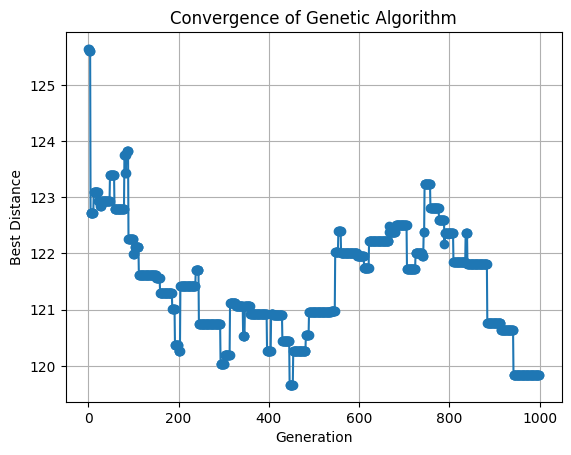

In [4]:
# Population Parameters 
population_size = 100
num_generations = 1000
survival_rate = 0.10
mutation_rate = 0.05

# Initialize the population
def initialize_population(num_individuals, num_cities):
    population = []
    for _ in range(num_individuals):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population


# Simple mutation: Swap 2 cities randomly
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]


best_distances = []
# Main genetic algorithm loop
population = initialize_population(population_size, num_cities)
for generation in range(num_generations):
    # Calculate fitness for each individual in the population
    fitness_scores = [calculate_fitness(individual, distance_matrix) for individual in population]

    # Selection: Select the best solutions to form the next generation based on fitness
    num_to_keep = int(population_size * survival_rate)
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population))]
    new_population = sorted_population[:num_to_keep]

    # Apply mutation to some of the individuals
    for individual in new_population:
        if random.random() < mutation_rate:
            mutate(individual)

    # Fill the remaining population with random individuals
    for _ in range(population_size - num_to_keep):
        new_individual = list(range(num_cities))
        random.shuffle(new_individual)
        new_population.append(new_individual)

    # Update the population with the new generation
    population = new_population

    # Calculate and print the best solution in this generation
    best_individual = population[fitness_scores.index(min(fitness_scores))]
    best_distances.append(min(fitness_scores))


# Create a list of generation numbers for the x-axis
generations = list(range(len(best_distances)))

print(best_distances[-1])
# Plot the best distances
plt.plot(generations, best_distances, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Convergence of Genetic Algorithm')
plt.grid(True)
plt.show()



# Algorithm 2: Roulette Wheel Selection
* Parameters: 
    - Population Size
    - Number of Generations
    - Survival Rate
    - Mutation Rate

We now introduce roulette wheel selection where we select individuals from our population with a probability proportional to their fitness. 

For our Roulette Wheel probability we just linearly extrapolate from max to min fitness. 

123.06756889392467


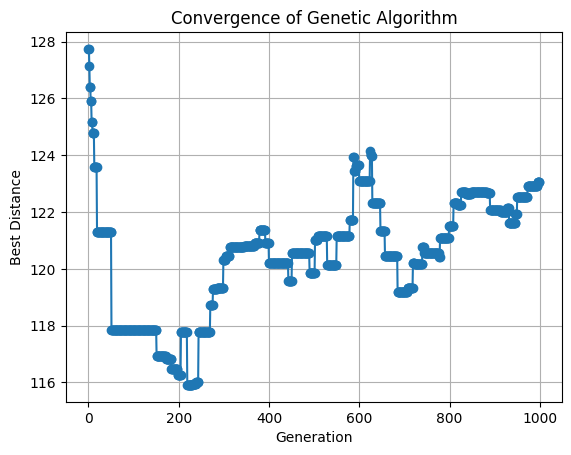

In [5]:
# Population Parameters 
population_size = 100
num_generations = 1000
survival_rate = 0.10
mutation_rate = 0.05

# Initialize the population
def initialize_population(num_individuals, num_cities):
    population = []
    for _ in range(num_individuals):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population


# Simple mutation: Swap 2 cities randomly
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]


best_distances = []
# Main genetic algorithm loop
population = initialize_population(population_size, num_cities)
for generation in range(num_generations):
    # Calculate fitness for each individual in the population
    fitness_scores = [calculate_fitness(individual, distance_matrix) for individual in population]

    max_fitness, min_fitness = max(fitness_scores), min(fitness_scores)


    # Selection: Select the best solutions to form the next generation based on fitness
    new_population = []
    for i in range(len(population)): 
        if random.random() < (max_fitness - fitness_scores[i]) / (max_fitness - min_fitness):
            new_population.append(population[i])
    

    # Apply mutation to some of the individuals
    for individual in new_population:
        if random.random() < mutation_rate:
            mutate(individual)

    # Fill the remaining population with random individuals
    for _ in range(population_size - num_to_keep):
        new_individual = list(range(num_cities))
        random.shuffle(new_individual)
        new_population.append(new_individual)

    # Update the population with the new generation
    population = new_population

    # Calculate and print the best solution in this generation
    best_distances.append(min(fitness_scores))


# Create a list of generation numbers for the x-axis
generations = list(range(len(best_distances)))

print(best_distances[-1])
# Plot the best distances
plt.plot(generations, best_distances, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Convergence of Genetic Algorithm')
plt.grid(True)
plt.show()



# Algorithm 3: Elitism and Asexual Reproduction
* Parameters: 
    - Population Size
    - Number of Generations
    - Survival Rate
    - Mutation Rate

Elitism is when we take the most fit individuals and bring them directly to the new population. We also add asexual reproduction by having these individuals produce 3 offspring which will each recieve a random mutation, and we will fill the remaining population with random samples as before. 

48.436814668310916


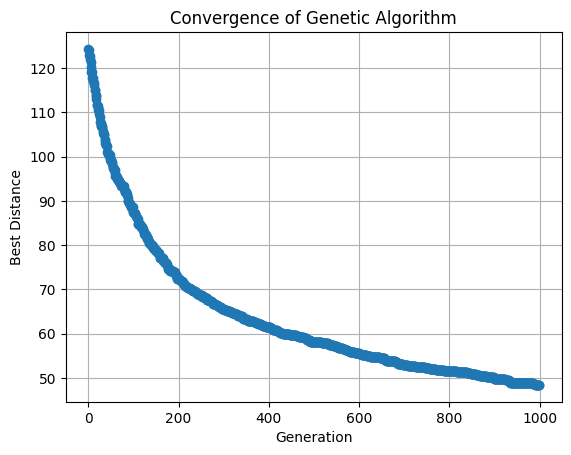

In [6]:
# Population Parameters 
population_size = 100
num_generations = 1000
survival_rate = 0.10
mutation_rate = 0.50
offspring_per_selected = 3

# Initialize the population
def initialize_population(num_individuals, num_cities):
    population = []
    for _ in range(num_individuals):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population


# Simple mutation: Swap 2 cities randomly
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]


best_distances = []
# Main genetic algorithm loop
population = initialize_population(population_size, num_cities)
for generation in range(num_generations):
    # Calculate fitness for each individual in the population
    fitness_scores = [calculate_fitness(individual, distance_matrix) for individual in population]

    # Selection: Select the best solutions to form the next generation based on fitness
    num_to_keep = int(population_size * survival_rate)
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population))]
    selected_population = sorted_population[:num_to_keep]
    new_population = selected_population.copy()

    # Reproduction: Each selected individual produces 3 offspring, each of which receives a random mutation
    for individual in selected_population:
        for _ in range(offspring_per_selected):
            offspring = individual.copy()
            mutate(offspring)  # Mutate the offspring
            new_population.append(offspring)

    # Fill the remaining population with random individuals
    for _ in range(population_size - len(new_population)):
        new_individual = list(range(num_cities))
        random.shuffle(new_individual)
        new_population.append(new_individual)

    # Update the population with the new generation
    population = new_population

    # Calculate and print the best solution in this generation
    best_individual = population[fitness_scores.index(min(fitness_scores))]
    best_distances.append(min(fitness_scores))


# Create a list of generation numbers for the x-axis
generations = list(range(len(best_distances)))

print(best_distances[-1])
# Plot the best distances
plt.plot(generations, best_distances, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Convergence of Genetic Algorithm')
plt.grid(True)
plt.show()



# Algorithm 4: Sexual Reproduction (1 Point Crossover)

In this algorithm we will take two parent individuals, and uniformly randomly decide a crossover point. From this crossover point (e.g. 30%) we will take the first 30% of the trip from the first individual, and fill the remainder of the trip from the second individual. 

We will combine pairs in descending order from the top 1/2 of the population, and fill the rest of the population with new random individuals. 

Note there will be no mutations in this case. 

120.66783165840255


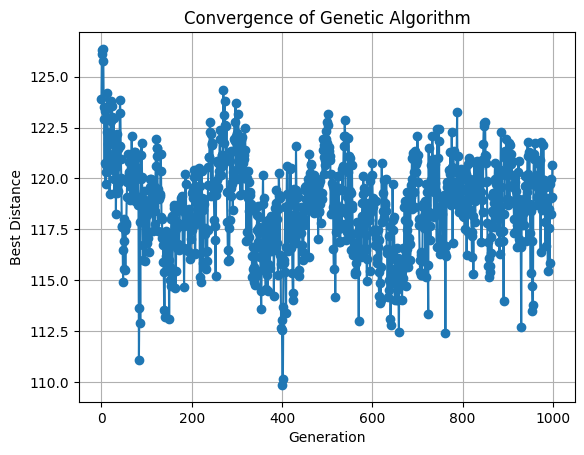

In [7]:
# Population Parameters 
population_size = 100
num_generations = 1000
mutation_rate = 0
offspring_per_selected = 1

# Initialize the population
def initialize_population(num_individuals, num_cities):
    population = []
    for _ in range(num_individuals):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population


# Simple mutation: Swap 2 cities randomly
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

# Uniform 1-Point Crossover: Takes two individuals, randomly chooses an crossover point, takes the 
# first order from first individual and fills the rest with the ordering from the second individual
def uniform_crossover(individual_1, individual_2): 
    crossover_point = int(random.random()*len(individual_1))
    new_individual = individual_1[:crossover_point]
    for x in individual_2: 
        if x not in new_individual: 
            new_individual.append(x)
    return new_individual


best_distances = []
# Main genetic algorithm loop
population = initialize_population(population_size, num_cities)
for generation in range(num_generations):
    # Calculate fitness for each individual in the population
    fitness_scores = [calculate_fitness(individual, distance_matrix) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population))]
    # Calculate and print the best solution in this generation
    best_individual = population[fitness_scores.index(min(fitness_scores))]
    best_distances.append(min(fitness_scores))

    # Breed population
    new_population = []
    for i in range(int(len(sorted_population) / 2)):
        new_population.append(uniform_crossover(sorted_population[i], sorted_population[i+1]))
    
    # Fill the remaining population with random individuals
    for _ in range(population_size - len(new_population)):
        new_individual = list(range(num_cities))
        random.shuffle(new_individual)
        new_population.append(new_individual)

    # Update the population with the new generation
    population = new_population



# Create a list of generation numbers for the x-axis
generations = list(range(len(best_distances)))

print(best_distances[-1])
# Plot the best distances
plt.plot(generations, best_distances, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Convergence of Genetic Algorithm')
plt.grid(True)
plt.show()



# Algorithm 5: Sexual Reproduction and Elitism

Combining all of the above, we will:  
- Keep the top 10% of the population as is (elitism) and asexually reproduce these with mutation
- Sexually reproduce pairs from the top 30% 
- Fill the remaining 30% with new random individuals

43.9339925257719


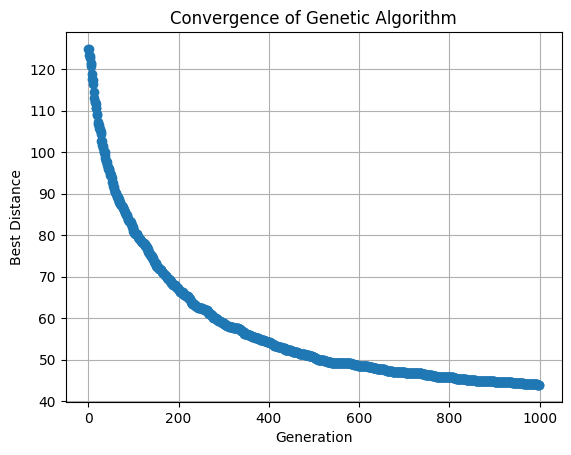

In [8]:
# Population Parameters 
population_size = 100
num_generations = 1000
survival_rate = 0.10
offspring_per_selected = 3
sexual_selection_rate = 0.3

# Initialize the population
def initialize_population(num_individuals, num_cities):
    population = []
    for _ in range(num_individuals):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population


# Simple mutation: Swap 2 cities randomly
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]


# Uniform 1-Point Crossover: Takes two individuals, randomly chooses an crossover point, takes the 
# first order from first individual and fills the rest with the ordering from the second individual
def uniform_crossover(individual_1, individual_2): 
    crossover_point = int(random.random()*len(individual_1))
    new_individual = individual_1[:crossover_point]
    for x in individual_2: 
        if x not in new_individual: 
            new_individual.append(x)
    return new_individual

def sexual_reproduction(subpopulation): 
    new_population = []
    for i in range(len(subpopulation) - 1): 
        new_population.append(uniform_crossover(subpopulation[i], subpopulation[i+1]))
    return new_population


best_distances = []
# Main genetic algorithm loop
population = initialize_population(population_size, num_cities)
for generation in range(num_generations):
    # Calculate fitness for each individual in the population
    fitness_scores = [calculate_fitness(individual, distance_matrix) for individual in population]
    # Calculate and print the best solution in this generation
    best_individual = population[fitness_scores.index(min(fitness_scores))]
    best_distances.append(min(fitness_scores))

    # Selection: Select the best solutions to form the next generation based on fitness
    num_to_keep = int(population_size * survival_rate)
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population))]
    selected_population = sorted_population[:num_to_keep]
    new_population = selected_population.copy()
    
    # Asexual Reproduction: Each selected individual produces 3 offspring, each of which receives a random mutation
    for individual in selected_population:
        for _ in range(offspring_per_selected):
            offspring = individual.copy()
            mutate(offspring)  # Mutate the offspring
            new_population.append(offspring)

    # Sexual Reproduction
    new_population = new_population + sexual_reproduction(sorted_population[:int(sexual_selection_rate * len(sorted_population))])
    
    # Fill the remaining population with random individuals
    for _ in range(population_size - len(new_population)):
        new_individual = list(range(num_cities))
        random.shuffle(new_individual)
        new_population.append(new_individual)

    # Update the population with the new generation
    population = new_population



# Create a list of generation numbers for the x-axis
generations = list(range(len(best_distances)))

print(best_distances[-1])
# Plot the best distances
plt.plot(generations, best_distances, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Convergence of Genetic Algorithm')
plt.grid(True)
plt.show()



# Algorithm 6: Multiple Population Islands 

Additional Parameters: 
- Number of islands
- Migration Intervals

46.700370283168816


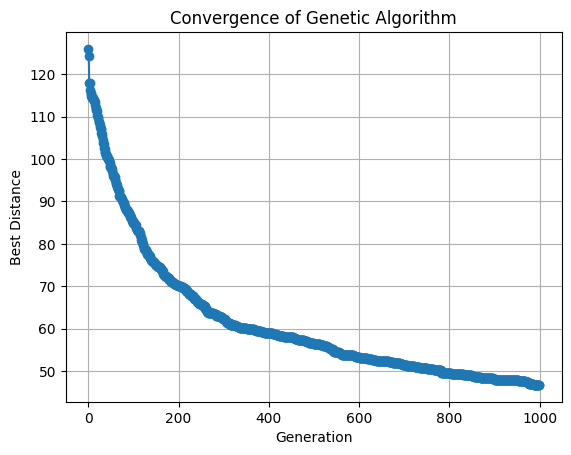

In [9]:
# Population Parameters 
population_size = 100
num_generations = 1000
survival_rate = 0.10
offspring_per_selected = 3
sexual_selection_rate = 0.3
num_islands = 4
migration_interval = 5


# Initialize the population
def initialize_population(num_individuals, num_cities):
    population = []
    for _ in range(num_individuals):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population

# Initialize populations on each island
def initialize_islands(total_pop_size, num_cities): 
    islands = []
    for i in range(num_islands):
        islands.append(initialize_population(int(total_pop_size/num_islands), num_cities))
    return islands


# Simple mutation: Swap 2 cities randomly
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]


# Uniform 1-Point Crossover: Takes two individuals, randomly chooses an crossover point, takes the 
# first order from first individual and fills the rest with the ordering from the second individual
def uniform_crossover(individual_1, individual_2): 
    crossover_point = int(random.random()*len(individual_1))
    new_individual = individual_1[:crossover_point]
    for x in individual_2: 
        if x not in new_individual: 
            new_individual.append(x)
    return new_individual

def sexual_reproduction(subpopulation): 
    new_population = []
    for i in range(len(subpopulation) - 1): 
        new_population.append(uniform_crossover(subpopulation[i], subpopulation[i+1]))
    return new_population


best_distances = []
# Main genetic algorithm loop
islands = initialize_islands(population_size, num_cities)
for generation in range(num_generations):
    
    best_distance_this_iteration = float('inf')

    # Perform typical GA for each island individually
    for i in range(num_islands):

        # Calculate fitness for each individual in the population
        fitness_scores = [calculate_fitness(individual, distance_matrix) for individual in islands[i]]
        # Calculate and print the best solution in this generation
        best_distance_this_iteration = min(min(fitness_scores), best_distance_this_iteration)

        # Selection: Select the best solutions to form the next generation based on fitness
        num_to_keep = int(population_size * survival_rate / num_islands)
        sorted_population = [x for _, x in sorted(zip(fitness_scores, islands[i]))]
        selected_population = sorted_population[:num_to_keep]
        new_population = selected_population.copy()
        
        # Asexual Reproduction: Each selected individual produces 3 offspring, each of which receives a random mutation
        for individual in selected_population:
            for _ in range(offspring_per_selected):
                offspring = individual.copy()
                mutate(offspring)  # Mutate the offspring
                new_population.append(offspring)

        # Sexual Reproduction
        new_population = new_population + sexual_reproduction(sorted_population[:int(sexual_selection_rate * len(sorted_population))])
        
        # Fill the remaining population with random individuals
        for _ in range(population_size - len(new_population)):
            new_individual = list(range(num_cities))
            random.shuffle(new_individual)
            new_population.append(new_individual)

        # Update the population with the new generation
        islands[i] = new_population
    
    # Append best distance for this previous iteration
    best_distances.append(best_distance_this_iteration)

    # Island Migration
    if (generation % migration_interval == 0):
        for idx in range(num_islands):
            # Select random individual from population
            migrant = random.choice(islands[(idx+1)%num_islands])
            # Replace random individual in current population with selected individual
            replace_idx = random.randint(0, population_size-1)
            islands[idx][replace_idx] = migrant


# Create a list of generation numbers for the x-axis
generations = list(range(len(best_distances)))

print(best_distances[-1])
# Plot the best distances
plt.plot(generations, best_distances, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Convergence of Genetic Algorithm')
plt.grid(True)
plt.show()



# More islands, bigger populations, and fewer generations

63.48017725199032


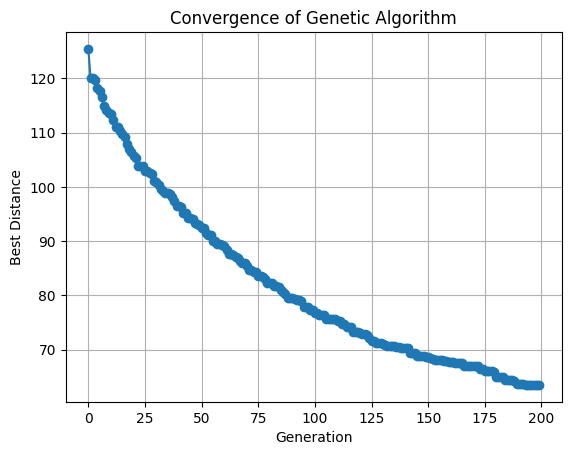

In [10]:
# Population Parameters 
population_size = 500
num_generations = 200
survival_rate = 0.10
offspring_per_selected = 3
sexual_selection_rate = 0.3
num_islands = 10
migration_interval = 5


# Initialize the population
def initialize_population(num_individuals, num_cities):
    population = []
    for _ in range(num_individuals):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population

# Initialize populations on each island
def initialize_islands(total_pop_size, num_cities): 
    islands = []
    for i in range(num_islands):
        islands.append(initialize_population(int(total_pop_size/num_islands), num_cities))
    return islands


# Simple mutation: Swap 2 cities randomly
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]


# Uniform 1-Point Crossover: Takes two individuals, randomly chooses an crossover point, takes the 
# first order from first individual and fills the rest with the ordering from the second individual
def uniform_crossover(individual_1, individual_2): 
    crossover_point = int(random.random()*len(individual_1))
    new_individual = individual_1[:crossover_point]
    for x in individual_2: 
        if x not in new_individual: 
            new_individual.append(x)
    return new_individual

def sexual_reproduction(subpopulation): 
    new_population = []
    for i in range(len(subpopulation) - 1): 
        new_population.append(uniform_crossover(subpopulation[i], subpopulation[i+1]))
    return new_population


best_distances = []
# Main genetic algorithm loop
islands = initialize_islands(population_size, num_cities)
for generation in range(num_generations):
    
    best_distance_this_iteration = float('inf')

    # Perform typical GA for each island individually
    for i in range(num_islands):

        # Calculate fitness for each individual in the population
        fitness_scores = [calculate_fitness(individual, distance_matrix) for individual in islands[i]]
        # Calculate and print the best solution in this generation
        best_distance_this_iteration = min(min(fitness_scores), best_distance_this_iteration)

        # Selection: Select the best solutions to form the next generation based on fitness
        num_to_keep = int(population_size * survival_rate / num_islands)
        sorted_population = [x for _, x in sorted(zip(fitness_scores, islands[i]))]
        selected_population = sorted_population[:num_to_keep]
        new_population = selected_population.copy()
        
        # Asexual Reproduction: Each selected individual produces 3 offspring, each of which receives a random mutation
        for individual in selected_population:
            for _ in range(offspring_per_selected):
                offspring = individual.copy()
                mutate(offspring)  # Mutate the offspring
                new_population.append(offspring)

        # Sexual Reproduction
        new_population = new_population + sexual_reproduction(sorted_population[:int(sexual_selection_rate * len(sorted_population))])
        
        # Fill the remaining population with random individuals
        for _ in range(population_size - len(new_population)):
            new_individual = list(range(num_cities))
            random.shuffle(new_individual)
            new_population.append(new_individual)

        # Update the population with the new generation
        islands[i] = new_population
    
    # Append best distance for this previous iteration
    best_distances.append(best_distance_this_iteration)

    # Island Migration
    if (generation % migration_interval == 0):
        for idx in range(num_islands):
            # Select random individual from population
            migrant = random.choice(islands[(idx+1)%num_islands])
            # Replace random individual in current population with selected individual
            replace_idx = random.randint(0, population_size-1)
            islands[idx][replace_idx] = migrant


# Create a list of generation numbers for the x-axis
generations = list(range(len(best_distances)))

print(best_distances[-1])
# Plot the best distances
plt.plot(generations, best_distances, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Convergence of Genetic Algorithm')
plt.grid(True)
plt.show()



# Hybrid Algorithms

At each generational step, we can perform a different kind of local search for each individual. (See previous gradient free optimization techniques). 

One example if our parameter space is R^n would be choose a random subpopulation to perform Particle Swarm Optimization or a Coordinate Descent, and then go back to the genetic algorithm procedure. 

There are many possible ways to further optimize Genetics/Evolutionary algorithms, but this should have covered a rough basis for the kinds of ideas used. 

# Comparison to Local Search using Two-Opt

Below we will use the python_tsp heuristics package to implement the 2-Opt algorithm on a random path to find a local optimum. This algorithm works by searching for crossings in the path of the graph, and removing them by re-ordering. 

In [11]:
from python_tsp.heuristics import solve_tsp_local_search

permutation, distance = solve_tsp_local_search(np.array(distance_matrix), perturbation_scheme="two_opt")
print(calculate_fitness(permutation, distance_matrix=distance_matrix))



13.522543974046734


# Comparison to Simulated Annealing

Simulated Annealing certainly deserves its own talk. 

In [12]:
from python_tsp.heuristics import solve_tsp_simulated_annealing

permutation, distance = solve_tsp_simulated_annealing(np.array(distance_matrix))
print(calculate_fitness(permutation, distance_matrix=distance_matrix))



13.75745742248863


# Conclusion

Genetic Algorithms are quite cool, but it is very rare for them to be the right solution. 

Domain knowledge and a custom algorithm go a long way towards efficiently solving a given problem. 

However, there are reports of GA's being used for identifying optimal wing shapes for airplanes under certain constraints, and there is an entire class of antenna called "evolved antenna" that are specifically antenna designed mostly or fully by genetic algorithms. https://en.wikipedia.org/wiki/Evolved_antenna

This indicates that there may be some use cases where GA's are an efficient method to explore, likely with heavy use of hybrid algorithms for more efficient local searching. 

On the other hand: 

"I have never encountered any problem where genetic algorithms seemed to me the right way to attack it. Further, I have never seen any computational results reported using genetic algorithms that have favorably impressed me." - Steven Skiena, Author of Algorithm Design Manual. 